In [1]:
#%set_env SDSS_LOCAL_SAS_MIRROR=/hd0/data/APOGEE
#%set_env RESULTS_VERS=v603 
#%set_env APOGEE_APOKASC_REDUX=v6.2a
#env

In [2]:
from apogee.tools import download
download.ferreModelLibrary(lib='GK',pca=True,sixd=True,unf=False,dr=None,convertToBin=True)

In [3]:
import apogee
%matplotlib inline
import numpy as np
import apogee.tools.read as apread
import apogee.spec.plot as splot

In [4]:
import apogee.tools.read as apread
allStar= apread.allStar(rmcommissioning=True,main=False,ak=True, akvers='targ',adddist=False)

/home/deleenm/anaconda3/envs/bdmakes3/lib/python2.7/site-packages/apogee/spec/plot.py:174: RuntimeWarning: invalid value encountered in less_equal
  args[1][args[1] <= 0.]= numpy.nan



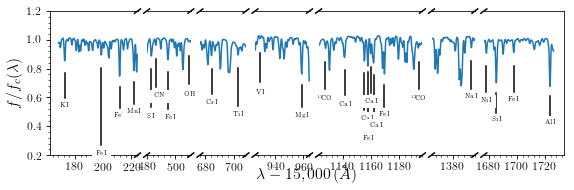

In [5]:
from apogee.modelspec import ferre


mspec= ferre.interpolate(4750.,2.5,-0.1,0.1,0.,0.)
splot.waveregions(mspec)

In [ ]:
splot.waveregion

In [6]:
data= apread.rcsample()
indx= data['SNR'] > 200.
data= data[indx]

# The following takes a while
param= ferre.fit(data[3512]['LOCATION_ID'],data[3512]['APOGEE_ID'],
                    lib='GK',pca=True,sixd=True)
print(param)

[[  4.67245500e+03   2.64900000e+00   2.08730163e-01  -4.43000000e-01
   -6.40000000e-02   1.10000000e-01   4.90000000e-02]]


For TYC 3559 the useful info is:
- https://dr12.sdss.org/infrared/spectrum/search?id=19164
- APOGEE_ID = 2M20041135+4505154
- Location_IC = 4462

In [7]:
allStar= apread.allStar(rmcommissioning=True,rmdups=True)

In [8]:
allStar.shape

(148311,)

In [9]:
allStar.dtype.fields

dict_proxy({'AK_TARG': (dtype('>f4'), 2005),
            'AK_TARG_METHOD': (dtype('S17'), 2009),
            'AK_WISE': (dtype('>f4'), 2026),
            'ALL_VISITS': (dtype('S737'), 2066),
            'ALL_VISIT_PK': (dtype(('>i4', (50,))), 3468),
            'ALPHAFE': (dtype('float64'), 3900),
            'AL_H': (dtype('>f4'), 1603),
            'AL_H_ERR': (dtype('>f4'), 1663),
            'AL_H_FLAG': (dtype('>i4'), 1723),
            'ANDFLAG': (dtype('>i4'), 524),
            'ANDFLAGS': (dtype('S59'), 528),
            'APOGEE_ID': (dtype('S18'), 157),
            'APOGEE_TARGET1': (dtype('>i4'), 257),
            'APOGEE_TARGET2': (dtype('>i4'), 261),
            'APSTAR_ID': (dtype('S45'), 0),
            'APSTAR_VERSION': (dtype('S5'), 675),
            'ASPCAPFLAG': (dtype('>i4'), 1418),
            'ASPCAPFLAGS': (dtype('S153'), 1422),
            'ASPCAP_CHI2': (dtype('>f4'), 1412),
            'ASPCAP_CLASS': (dtype('S2'), 1416),
            'ASPCAP_ID': (dtype('S44'),

In [10]:
param = ferre.fit(4462,'2M20041135+4505154',lib='GK',pca=True,sixd=True)
print(param)

[[  4.60330600e+03   2.92900000e+00   1.83575878e-01   2.25000000e-01
   -2.50000000e-02   3.09000000e-01   5.50000000e-02]]


In [11]:
#Get the actual value
fparam = allStar[(allStar['APOGEE_ID'] == '2M20041135+4505154')]['FPARAM']
print(fparam)

[[  4.60329980e+03   2.92950010e+00   1.83529601e-01   2.25170001e-01
   -2.49070004e-02   3.09480011e-01   5.45670018e-02]]


In [12]:
#Now include the Cannon
cparam = ferre.fit(4462,'2M20041135+4505154',lib='GK',pca=True,sixd=True,initcannon=True)
print(param)

[[  4.60330600e+03   2.92900000e+00   1.83575878e-01   2.25000000e-01
   -2.50000000e-02   3.09000000e-01   5.50000000e-02]]


Let's try converting to ASPCAP values using http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2015AJ....150..148H&db_key=AST&link_type=ABSTRACT&high=5a748cc7a900541

In [13]:
def dr12teff(raw_teff):
    '''This function applies the DR12 calibration to Effective Temperature'''
    #Add in limits for applicable teffs
    if raw_teff < 3000:
        raw_teff = 3000
    if raw_teff > 6000:
        raw_teff = 6000
    calib_teff = raw_teff - 0.0034*(raw_teff-4500)+87.9
    return calib_teff

In [14]:
teff_aspcap = float(allStar[(allStar['APOGEE_ID'] == '2M20041135+4505154')]['TEFF'])
print("Fparam: {:.3f}, Fit: {:.3f}, Cannon: {:.3f}".format(fparam[0,0],param[0,0],cparam[0,0]))
print("ASPCAP: {:.3f}, Fparam: {:.3f}, Fit: {:.3f}, Cannon: {:.3f}".format(teff_aspcap,dr12teff(fparam[0,0]),
                                                            dr12teff(param[0,0]),dr12teff(cparam[0,0])))

Fparam: 4603.300, Fit: 4603.306, Cannon: 4581.186
ASPCAP: 4690.999, Fparam: 4690.849, Fit: 4690.855, Cannon: 4668.810


Now do it on log g.

In [15]:
def dr12logg(raw_logg):
    '''This function applies the DR12 calibration to RGB Log g (do not use on RC stars).'''
    calib_logg = raw_logg + 0.14*raw_logg-0.588
    return calib_logg

In [16]:
logg_aspcap = float(allStar[(allStar['APOGEE_ID'] == '2M20041135+4505154')]['LOGG'])
print("Fparam: {:.3f}, Fit: {:.3f}, Cannon: {:.3f}".format(fparam[0,1],param[0,1],cparam[0,1]))
print("ASPCAP: {:.3f}, Fparam: {:.3f}, Fit: {:.3f}, Cannon: {:.3f}".format(logg_aspcap,dr12logg(fparam[0,1]),
                                                            dr12logg(param[0,1]),dr12logg(cparam[0,1])))

Fparam: 2.930, Fit: 2.929, Cannon: 2.891
ASPCAP: 2.753, Fparam: 2.752, Fit: 2.751, Cannon: 2.708


In [17]:
def dr12M_H(raw_M_H,teff):
    '''This function applies the DR12 calibration [M/H] log g <= 3.8'''
    
    #I don't know whether Teff is raw or calibrated or not
    if teff < 3800:
        teff = 3800
    if teff > 5250:
        teff = 5250
    
    #Cluster Offset
    print(raw_M_H)
    calib_M_H = raw_M_H +0.056*(teff -4500)/1000
    #Now add outside calibration
    extern_M_H = calib_M_H + 0.0260 + 0.255*calib_M_H + 0.062*calib_M_H**2
    return extern_M_H

def dr12alpha(raw_alpha,teff):
    '''This function applies the DR12 calibration [M/H] log g <= 3.8'''
    
    #I don't know whether Teff is calibrated or not
    if teff < 3800:
        teff = 3800
    if teff > 5250:
        teff = 5250   

    calib_alpha = raw_alpha +0.028*(teff -4500)/1000
    
    return calib_alpha

In [18]:
print(allStar[(allStar['APOGEE_ID'] == '2M20041135+4505154')]['PARAM'][0,6],dr12alpha(fparam[0,6],fparam[0,0]))
print(param)
M_H_aspcap = float(allStar[(allStar['APOGEE_ID'] == '2M20041135+4505154')]['METALS'])
print("Fparam: {:.3f}, Fit: {:.3f}, Cannon: {:.3f}".format(fparam[0,3],param[0,3],cparam[0,3]))
print("ASPCAP: {:.3f}, Fparam: {:.3f}, Fit: {:.3f}, Cannon: {:.3f}".format(M_H_aspcap,dr12M_H(fparam[0,3],fparam[0,0]),
                                                            dr12M_H(param[0,3],fparam[0,0])
                                                            ,dr12M_H(cparam[0,3],fparam[0,0])))

(0.057453979, 0.057459396291255953)
[[  4.60330600e+03   2.92900000e+00   1.83575878e-01   2.25000000e-01
   -2.50000000e-02   3.09000000e-01   5.50000000e-02]]
Fparam: 0.225, Fit: 0.225, Cannon: 0.217
0.22517
0.225
0.217
ASPCAP: 0.321, Fparam: 0.319, Fit: 0.319, Cannon: 0.309


In [19]:
alpha_aspcap = float(allStar[(allStar['APOGEE_ID'] == '2M20041135+4505154')]['ALPHAFE'])
print("Fparam: {:.4f}, Fit: {:.4f}, Cannon: {:.4f}".format(fparam[0,6],param[0,6],cparam[0,6]))
print("ASPCAP: {:.4f}, Fparam: {:.4f}, Fit: {:.4f}, Cannon: {:.4f}".format(alpha_aspcap,dr12alpha(fparam[0,6],fparam[0,0]),
                                                            dr12alpha(param[0,6],fparam[0,0])
                                                            ,dr12alpha(cparam[0,6],fparam[0,0])))

Fparam: 0.0546, Fit: 0.0550, Cannon: 0.0530
ASPCAP: 0.0575, Fparam: 0.0575, Fit: 0.0579, Cannon: 0.0559


## Overplot model spectrum on real spectrum

[[  4.60330600e+03   2.92900000e+00   1.83575878e-01   2.25000000e-01
   -2.50000000e-02   3.09000000e-01   5.50000000e-02]]


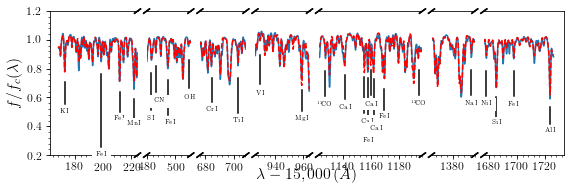

In [41]:
param = ferre.fit(4462,'2M20041135+4505154',lib='GK',pca=True,sixd=True)
print(param)
newparam = param.flatten()
mspec= ferre.interpolate(newparam[0],newparam[1],newparam[2],newparam[3],newparam[4],newparam[5])
splot.waveregions(4462,'2M20041135+4505154')
splot.waveregions(mspec,'r--',overplot=True)

In [42]:
print(float(allStar[(allStar['APOGEE_ID'] == '2M20041135+4505154')]['ASPCAP_CHI2']))

14.4810476303
